# Content and Objective

+ Show points that are distributed uniformly on an annulus being defined by $$\{ (x_1,x_2)^\mathrm{T}: x_2\geq 0, 1\leq x_1^2+x_2^2\leq 2\}$$
+ Marginal pdf w.r.t. x_1 is determined analytically and by simulation
+ Conditional pdf w.r.t. x_2 is provided and results are being discussed

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=1)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation of Points

In [3]:
# number of points to be sampled    
N_points = int( 1e5 )


# initialize empty list for points
points = []

# loop for generating points
while len( points ) < N_points:

    # sample point in [ -2, 2 ] x [ 0, 2 ]
    x1 = -2 + 4 * np.random.rand()
    x2 = 2 * np.random.rand()        
    
    # check if sampled point is within annulus
    if ( np.sqrt( x1**2 + x2**2 ) >= 1 and  np.sqrt( x1**2 + x2**2 ) <= 2):
        points.append( [x1,x2] )
    else:
        continue

# get x and y coordinated of all points        
collect_X1 = [ p[0] for p in points ]
collect_X2 = [ p[1] for p in points ]

Text(0, 0.5, '$x_2$')

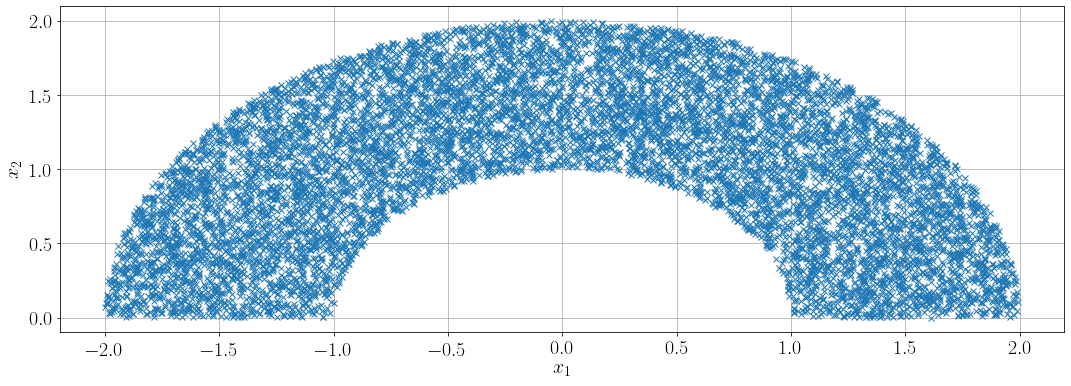

In [4]:
# plotting
# NOTE: Only subset of points is shown; realized by "slicing" only part of the lists
plt.plot( collect_X1[ : 10000], collect_X2[ : 10000], 'x')   

plt.grid( True )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Get PDF $f_{X_1}(x_1)$ and Plot with Histogram

In [5]:
# theoretical pdf as on lecture slides
delta_x = 0.001

# define slices on x1-axis as [-2,-1], [-1,1], [1,2]
x1_m2_m1 = np.arange( -2, -1, delta_x )
x1_m1_p1 = np.arange( -1 + delta_x, 1, delta_x )
x1_p1_p2 = np.arange( 1, 2 + delta_x , delta_x )    

f1_m2_m1 = 2 / 3. / np.pi * np.sqrt( 4 - x1_m2_m1**2 )
f1_m1_p1 = 2 / 3. / np.pi * ( np.sqrt( 4 - x1_m1_p1**2 ) - np.sqrt( 1 - x1_m1_p1**2 ) )
f1_p1_p2 = 2 / 3. / np.pi * np.sqrt( 4 - x1_p1_p2**2 )

x1 = np.concatenate( ( x1_m2_m1, x1_m1_p1, x1_p1_p2 ) )
f1 = np.concatenate( ( f1_m2_m1, f1_m1_p1, f1_p1_p2 ) )

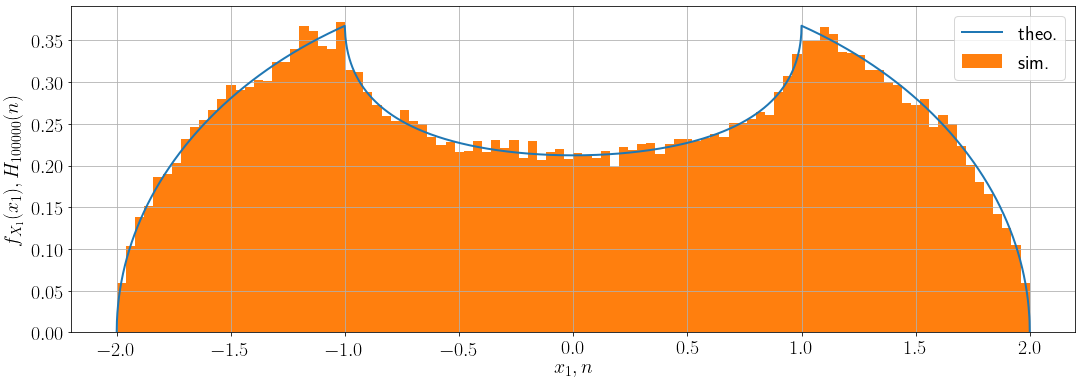

In [6]:
#plotting theoretical pdf and according histogram
plt.plot( x1, f1, linewidth=2.0, label='theo.')
plt.hist( collect_X1, bins=100, density=1, label='sim.' ) 

plt.grid( True )
plt.xlabel('$x_1, n$')
plt.ylabel('$f_{{X_1}}(x_1), H_{{{}}}(n)$'.format( N_points ) )
plt.legend(loc='upper right')

# Get Conditional PDF $f_{X_2}(x_2|X_1=x_1)$

In [7]:
# several values for x1
x1 = [ -1, -.5, 0, .5, 1 ]

# vector x2 for the pdf and pdf
# array of array f2_cond_x2 for several pdfs depending on x1
x2 = np.arange( 0, 2, delta_x )     
f2_cond_x1 = np.zeros( ( len(x1), len(x2) ) )

# loop for different x1
for ind_x1, val_x1 in enumerate( x1 ):

    # get theoretical pdf
    f2_cond_x1[ ind_x1, : ] = 1 / ( np.sqrt( 4 - val_x1**2 ) - np.sqrt( 1 - val_x1**2 ) )

    # set pdf to zero where necessary
    ind_to_be_del = [ ind_x2 for ind_x2, val_x2 in enumerate( x2 ) 
        if ( np.abs( val_x2 ) > np.sqrt(  4 - val_x1**2 ) or np.abs( val_x2 ) < np.sqrt(  1 - val_x1**2 ) or val_x2 < 0 or val_x2 > 2)  ]
    
    f2_cond_x1[ ind_x1, ind_to_be_del ] = 0.0      

(-0.1, 1.1)

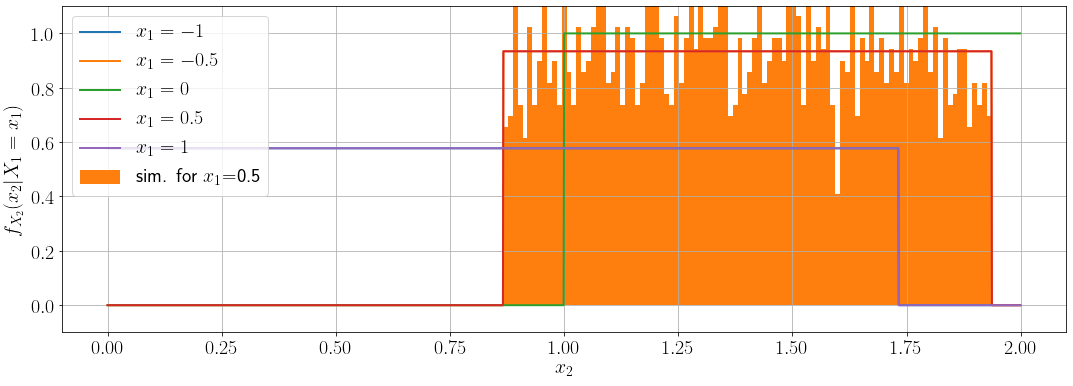

In [8]:
# plotting

# loop for different x1
for ind_x, val_x in enumerate( x1 ): 

    plt.plot( x2, f2_cond_x1[ ind_x, :], linewidth=2.0, label='$x_1 = {{{}}}$'.format( val_x ) ) 


# get histogram of conditional pdf by choosing only point where x_1 is approx. val_x1
# and where y coordinate is within the possible values
val_x1 = 0.5

conditional_points = [ x2 for [x1,x2] in points if np.abs( x1 - val_x1 ) < .05 
                      and 1 - val_x1**2 <= x2 ** 2 <= 4 - val_x1**2 ]

plt.hist( conditional_points, bins=100, density=1, color='#ff7f0e', label='sim. for $x_1$={}'.format(val_x1) ) 


plt.xlabel('$x_2$')
plt.ylabel('$f_{X_2}(x_2|X_1 = x_1)$')
plt.grid( True )
plt.legend( loc = 'upper left' )
plt.xlim( (-.1, 2.1) )    
plt.ylim( (-.1, 1.1) ) 

 <font color="#009682"><b>Question:</b></font> Can you reason why simulated (orange) distribution doesn't exactly match a uniform distribution?

<font color="#009682"><b>Exercise:</b></font> Show that expectation of X_2 is as found in the lecture.

<font color="#009682"><b>Hint:</b></font> Maybe Numpy's "average" might be a good idea...